## Data Science Position Task

#### 1-  Objective and Hypothesis

###### The objective of this task is to conclude whether or not people in the Muslim world die more often in month of Shaban. I will be using a ###### combination of hypothesis testing and data exploration to support any claims.

###### The null hypothesis (H<sub>0</sub>) is that average number of the deaths for all months are the same. 
###### The alternate hypothesis (H<sub>a</sub>) is that the average number of deaths of the month of Shaban is more than all months.

#### 2- Data Collection 

In [183]:
# import required python packages 
import pandas as pd
import numpy as np 

from scipy import stats

In [2]:
data = pd.read_csv('./data/data.csv', names=['name', 'gender', 'nationality', 'age', 'burial_date'], skiprows=1)

In [3]:
data.head()

,name,gender,nationality,age,burial_date
0,عيشه بنت محمد تكروني,أنثى,سعودي,NaN,1364/08/29
1,عفيه بنت محمد,أنثى,سعودي,NaN,1364/08/29
2,منير بنت عوده,أنثى,سعودي,2 سنة,1365/01/10
3,زهره علي بادري,أنثى,سعودي,50 سنة,1365/04/17
4,زينب بنت عقل سي,أنثى,سعودي,NaN,1365/05/22


#### 3- Data Exploration and Cleaning

In [4]:
# check the column data types
data.dtypes

name           object
gender         object
nationality    object
age            object
burial_date    object
dtype: object

In [5]:
# check for the shape of the data 
print(data.shape)

# explore data for any nulls
data.isna().sum()

(1500, 5)


name            0
gender          0
nationality     3
age            38
burial_date     0
dtype: int64

In [6]:
# We can ignore the nulls in the age column since we are interested in the total number of deaths in each month
# In another senario this needs more investigation. 

In [7]:
# chack and remove any duplicates in the data
print(data[data.duplicated()].shape)

data[data.duplicated()]

(12, 5)


,name,gender,nationality,age,burial_date
452,الامير الحسن الرضا السنوسي,ذكر,ليبي,65 سنة,1412/11/01
803,حسن حاج حسين نصرتي,ذكر,إيراني,62 سنة,1412/12/22
819,عثمان علي مهرام,ذكر,باكستاني,57 سنة,1412/12/24
820,عثمان علي مهرام,ذكر,باكستاني,57 سنة,1412/12/24
829,طفل غلو غشن,ذكر,باكستاني,04 اشهر,1413/01/06
883,طفله مقبل عريميط حضيض,أنثى,سعودي,05 اشهر,1413/01/14
900,مديني غنيمان الرشيدى,ذكر,سعودي,52 سنة,1413/01/17
1039,طفل صبيحه كوثر نزير احمد,ذكر,باكستاني,05 اشهر,1413/02/10
1068,طفله سلمى لافى اللقمانى,أنثى,سعودي,08 اشهر,1413/02/14
1258,امل ياسين عبدالعزيز,ذكر,مصري,05 اشهر,1413/03/08


In [8]:
# We have 12 duplicated rows in our data. We will remove the duplicates from our data
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(1488, 5)

In [10]:
# restructuring the age column and making separate year, month and day colunm 

data['age_unit'] = data.age.map(lambda x: x.split(' ')[1] if(pd.notnull(x)) else x)
data['age'] = data.age.map(lambda x: x.split(' ')[0] if(pd.notnull(x)) else x)

In [11]:
data['year'] = data.burial_date.map(lambda x: x.split('/')[0])
data['month'] = data.burial_date.map(lambda x: x.split('/')[1])
data['day'] = data.burial_date.map(lambda x: x.split('/')[2])

In [12]:
data.head()

,name,gender,nationality,age,burial_date,age_unit,year,month,day
0,عيشه بنت محمد تكروني,أنثى,سعودي,NaN,1364/08/29,NaN,1364,08,29
1,عفيه بنت محمد,أنثى,سعودي,NaN,1364/08/29,NaN,1364,08,29
2,منير بنت عوده,أنثى,سعودي,2,1365/01/10,سنة,1365,01,10
3,زهره علي بادري,أنثى,سعودي,50,1365/04/17,سنة,1365,04,17
4,زينب بنت عقل سي,أنثى,سعودي,NaN,1365/05/22,NaN,1365,05,22


In [32]:
data_year_month = pd.DataFrame(data.groupby(['year','month']).count()['name']).reset_index()

In [33]:
data_daily = pd.DataFrame(data.groupby(['burial_date']).count()['name']).reset_index()

In [75]:
(data_year_month['month'] == '01').sum()

19

#### 3- Modeling 

In [36]:
## Starting by testing our hypothesis. Since we have more than two category and to prevent the model from causing more 
## false positives, a Analysis of Variance (ANOVA) will be used. 

In [152]:
d = {'1': np.array(data_year_month.name[data_year_month['month'] == '01']), 
    '2': np.array(data_year_month.name[data_year_month['month'] == '02']),
    '3': np.array(data_year_month.name[data_year_month['month'] == '03']),
    '4': np.array(data_year_month.name[data_year_month['month'] == '04']),
    '5': np.array(data_year_month.name[data_year_month['month'] == '05']),
    '6': np.array(data_year_month.name[data_year_month['month'] == '06'])}

In [153]:
samples = pd.DataFrame.from_dict(d, orient='index').transpose()

In [154]:
samples

,1,2,3,4,5,6
0,1.0,2.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,2.0,1.0,1.0,1.0
3,1.0,1.0,1.0,2.0,1.0,1.0
4,1.0,2.0,2.0,1.0,1.0,2.0
5,1.0,1.0,1.0,3.0,3.0,1.0
6,1.0,2.0,1.0,1.0,1.0,2.0
7,1.0,2.0,1.0,1.0,2.0,1.0
8,2.0,1.0,3.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,2.0


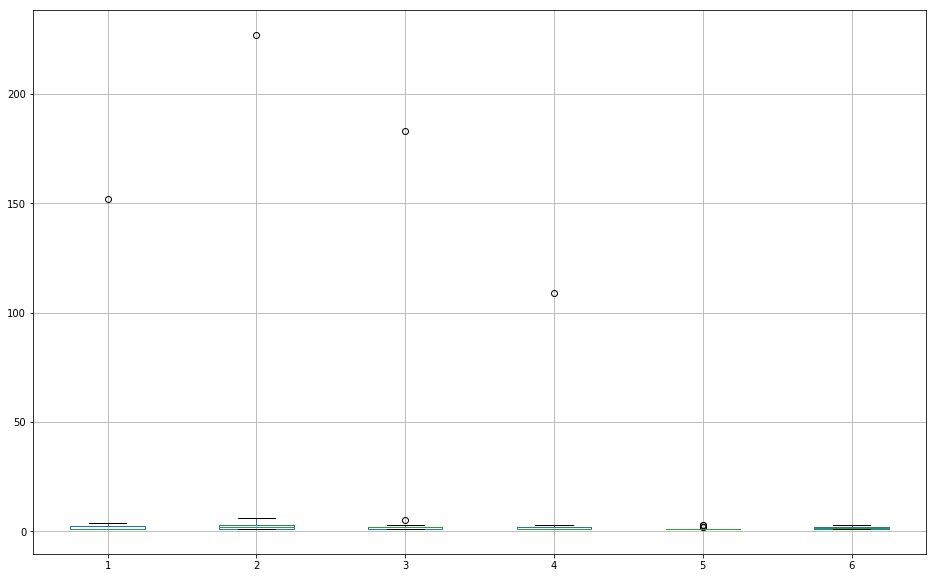

In [155]:
samples.boxplot(figsize=(16,10))

In [157]:
# by looking at the boxplot we see a lot of outliers which might affect our hypothesis test. A normal distribution 
# will give a more accurate hypothesis test when using ANOVA analysis. We will use the (Interquartile Range) 
# IQR to detect and remove outliers
columns = ['1', '2', '3', '4', '5', '6']


qrt1 = samples.quantile(0.25)
qrt3 = samples.quantile(0.75) 
IQR = qrt3 - qrt1 
print(IQR)

1    1.5
2    2.0
3    1.0
4    1.0
5    0.0
6    1.0
dtype: float64


In [159]:
samples[(samples < (qrt1 - 1.5 * IQR)) | (samples > (qrt3 + 1.5 * IQR))] = np.nan

In [160]:
samples

,1,2,3,4,5,6
0,1.0,2.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,2.0,1.0,1.0,1.0
3,1.0,1.0,1.0,2.0,1.0,1.0
4,1.0,2.0,2.0,1.0,1.0,2.0
5,1.0,1.0,1.0,3.0,NaN,1.0
6,1.0,2.0,1.0,1.0,1.0,2.0
7,1.0,2.0,1.0,1.0,NaN,1.0
8,2.0,1.0,3.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,2.0


In [ ]:
# with outliers removed we can perfom check if the datasets are normaly distributed

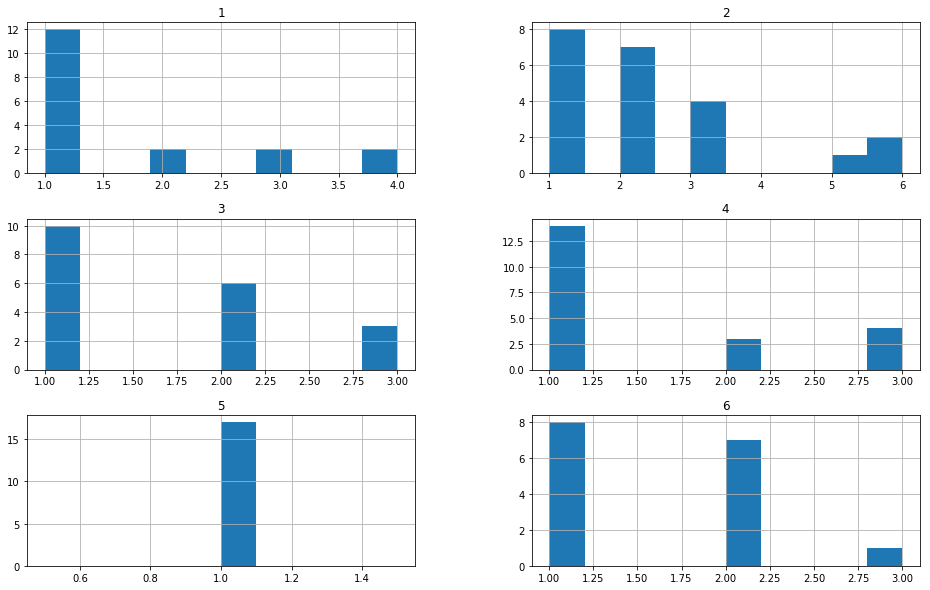

In [163]:
# visual check
samples.hist(figsize=(16,10));

In [167]:
cols = ['1' ,'2' ,'3' ,'4', '5', '6']
# the shaprio-wilk test of normality 
for col in cols:
    stat, p = stats.shapiro(samples[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)', 'for column ', col)
    else:
        print('Sample does not look Gaussian (reject H0)', 'for column ', col)

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0) for column  1
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0) for column  2
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0) for column  3
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0) for column  4
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0) for column  5
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0) for column  6


In [171]:
# preparing the data for anova analysis 
data_anova = data_year_month[['month', 'name']]

In [172]:
data_anova

,month,name
0,08,2
1,01,1
2,04,1
3,05,1
4,08,1
5,11,1
6,03,1
7,04,1
8,05,1
9,07,1


In [182]:
# defining the data and the parameters
groups = pd.unique(data_anova.month.values)
data_anova_dict = {group:data_anova['name'][data_anova.month == group] for group in groups}
k = len(groups)
N = len(data_anova.values)
n = data.groupby('month').size()[0]

In [185]:
groups

array(['08', '01', '04', '05', '11', '03', '07', '09', '10', '12', '06',
       '02'], dtype=object)

In [187]:
f, p = stats.f_oneway(data_anova_dict['01'], data_anova_dict['02'], data_anova_dict['03'], data_anova_dict['04'], data_anova_dict['05'],
                     data_anova_dict['06'], data_anova_dict['07'], data_anova_dict['08'], data_anova_dict['09'], data_anova_dict['10'], data_anova_dict['11'],
                     data_anova_dict['12'])

#### 4- Results and Summary

In [188]:
f, p

(0.5305838991312112, 0.8817407109368889)

##### Further Analysis

In [ ]:
# for further analysis we would investigate the outliers and see the effects of those outliers on the hypothesis test. 
# More would be seeing the effects of visitors and population changes on the assumption that people die more offen on the
# month of Shaban especi 

##### Result Interpretation

###### The f value is the f statistics value of the ANOVA hypothesis test which measures the variability between groups over the variablity among ###### groups. The p value measures the overall interactions between groups and since the p value is mush higher than the threshold which alpha ###### = 0.05 then we would assume that there is not a statistical significance and would accept the null hypothesis that the means are the same.  

#### 5-Resources